 ### Build the feature vector


# The Decision Tree on the Churn Dataset in Spark

In [1]:
from pyspark.sql import DataFrameReader
from pyspark.sql import SparkSession
from pyspark.ml.feature import IndexToString, StringIndexer, VectorAssembler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from Notebooks.helpers.helper_functions import translate_to_file_string
#Own imports
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Select the Data file 

In [2]:
inputFile = translate_to_file_string("data/data_test.csv")

## Create the Spark Session 

In [3]:
#create a SparkSession
spark = (SparkSession
       .builder
       .appName("ChurnDecisionTree")
       .getOrCreate())
# create a DataFrame using an ifered Schema 
df = spark.read.option("header", "true") \
       .option("inferSchema", "true") \
       .option("delimiter", ";") \
       .csv(inputFile)   

## Data Preparation


In [ ]:
#Change 

In [10]:
#Create Pandas DataFrame
df_pandas = df.toPandas()
#Pandas Indexing Method
df_pandas.Gender = pd.factorize(df_pandas.Gender)[0]
df_pandas.Partner = pd.factorize(df_pandas.Partner)[0]
df_pandas.Dependents = pd.factorize(df_pandas.Dependents)[0]
#df_pandas."Phone Service" = pd.factorize(df_pandas."Phone Service")[0]

#Show Data + Schema of the Data
#HTML(df_pandas.to_html())
df_pandas.info()

SyntaxError: invalid syntax (<ipython-input-10-4cdb0db66255>, line 7)

### Transform labels into index

In [11]:
IDIndexer = StringIndexer().setInputCol("CustomerID").setOutputCol("CustomerID_Int").fit(df)
genderIndexer = StringIndexer().setInputCol("Gender").setOutputCol("GenderID_Int").fit(df)
seniorIndexer = StringIndexer().setInputCol("Senior Citizen").setOutputCol("Senior_Int").fit(df)
partnerIndexer = StringIndexer().setInputCol("Partner").setOutputCol("Partner_Int").fit(df)
DependentsIndexer = StringIndexer().setInputCol("Dependents").setOutputCol("Dependents_Int").fit(df)
tenureIndexer = StringIndexer().setInputCol("Tenure").setOutputCol("Tenure_Int").fit(df)
phoneIndexer = StringIndexer().setInputCol("Phone Service").setOutputCol("PhoneService_Int").fit(df)
multipleIndexer = StringIndexer().setInputCol("Multiple Lines").setOutputCol("Multiple_Int").fit(df)
internetIndexer = StringIndexer().setInputCol("Internet Service").setOutputCol("Internet_Service_Int").fit(df)
onlineSecurityIndexer = StringIndexer().setInputCol("Online Security").setOutputCol("Online_Security_Int").fit(df)
onlineBackupIndexer = StringIndexer().setInputCol("Online Backup").setOutputCol("Online_Backup_Int").fit(df)
deviceIndexer = StringIndexer().setInputCol("Device Protection").setOutputCol("Device_Protection_Int").fit(df)
techIndexer = StringIndexer().setInputCol("Tech Support").setOutputCol("Tech_Support_Int").fit(df)
streamingTVIndexer = StringIndexer().setInputCol("Streaming TV").setOutputCol("Streaming_TV_Int").fit(df)
streamingMoviesIndexer = StringIndexer().setInputCol("Streaming Movies").setOutputCol("Streaming_Movies_Int").fit(df)
contractIndexer = StringIndexer().setInputCol("Contract").setOutputCol("Contract_Int").fit(df)
paperlessIndexer = StringIndexer().setInputCol("Paperless Billing").setOutputCol("Paperless_Billing_Int").fit(df)
paymentIndexer = StringIndexer().setInputCol("Payment Method").setOutputCol("Payment_Method_Int").fit(df)
monthlyIndexer = StringIndexer().setInputCol("Monthly Charges").setOutputCol("Monthly_Charges_Int").fit(df)
totalIndexer = StringIndexer().setInputCol("Total Charges").setOutputCol("Total_Charges_Int").fit(df)

In [12]:

labeledData = IDIndexer.setHandleInvalid("keep").transform(df)
labeledData = genderIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = seniorIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = partnerIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = DependentsIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = tenureIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = phoneIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = multipleIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = internetIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = onlineSecurityIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = onlineBackupIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = deviceIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = techIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = streamingTVIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = streamingMoviesIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = contractIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = paperlessIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = paymentIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = monthlyIndexer.setHandleInvalid("keep").transform(labeledData)
labeledData = totalIndexer.setHandleInvalid("keep").transform(labeledData)

labeledData.printSchema()

root
 |-- CustomerID: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Senior Citizen: integer (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Phone Service: string (nullable = true)
 |-- Multiple Lines: string (nullable = true)
 |-- Internet Service: string (nullable = true)
 |-- Online Security: string (nullable = true)
 |-- Online Backup: string (nullable = true)
 |-- Device Protection: string (nullable = true)
 |-- Tech Support: string (nullable = true)
 |-- Streaming TV: string (nullable = true)
 |-- Streaming Movies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- Paperless Billing: string (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Monthly Charges: double (nullable = true)
 |-- Total Charges: double (nullable = true)
 |-- CustomerID_Int: double (nullable = false)
 |-- GenderID_Int: double (nullable = false)
 |-- Senior_I

In [13]:
#labeledData.show()
#labeledData.printSchema()
pandasData = labeledData.drop("CustomerID")
pandasData = pandasData.drop("Gender")
pandasData = pandasData.drop("Senior Citizen")
pandasData = pandasData.drop("Partner")
pandasData = pandasData.drop("Dependents")
pandasData = pandasData.drop("Tenure")
pandasData = pandasData.drop("Phone Service")
pandasData = pandasData.drop("Multiple Lines")
pandasData = pandasData.drop("Internet Service")
pandasData = pandasData.drop("Online Security")
pandasData = pandasData.drop("Online Backup")
pandasData = pandasData.drop("Device Protection")
pandasData = pandasData.drop("Tech Support")
pandasData = pandasData.drop("Streaming TV")
pandasData = pandasData.drop("Streaming Movies")
pandasData = pandasData.drop("Contract")
pandasData = pandasData.drop("Paperless Billing")
pandasData = pandasData.drop("Payment Method")
pandasData = pandasData.drop("Monthly Charges")
pandasData = pandasData.drop("Total Charges")
#pandasData.printSchema()
#notNull = pandasData.filter(pandasData.CustomerID_Int.isNotNull())
#notNull = notNull.filter(notNull.Monthly_Charges_Int.isNotNull())
#notNull = notNull.filter(notNull.Total_Charges_Int.isNotNull())
#df_selected = notNull.select('CustomerID_Int', 'Monthly_Charges_Int', 'Total_Charges_Int')
#df_small = df_selected.select('*').filter("Monthly_Charges_Int > 200.0").filter("Monthly_Charges_Int < 600.0")
df_pandas = pandasData.toPandas()


### Visualizations

#### TODO: Boxplots (Monthly, Tenure, Total)
####       Balkendiagramme für Spalten mit wenig ausprägungen (anzahl)
####       Monhthly Charges je nach Contract visualisieren (Boxplot)


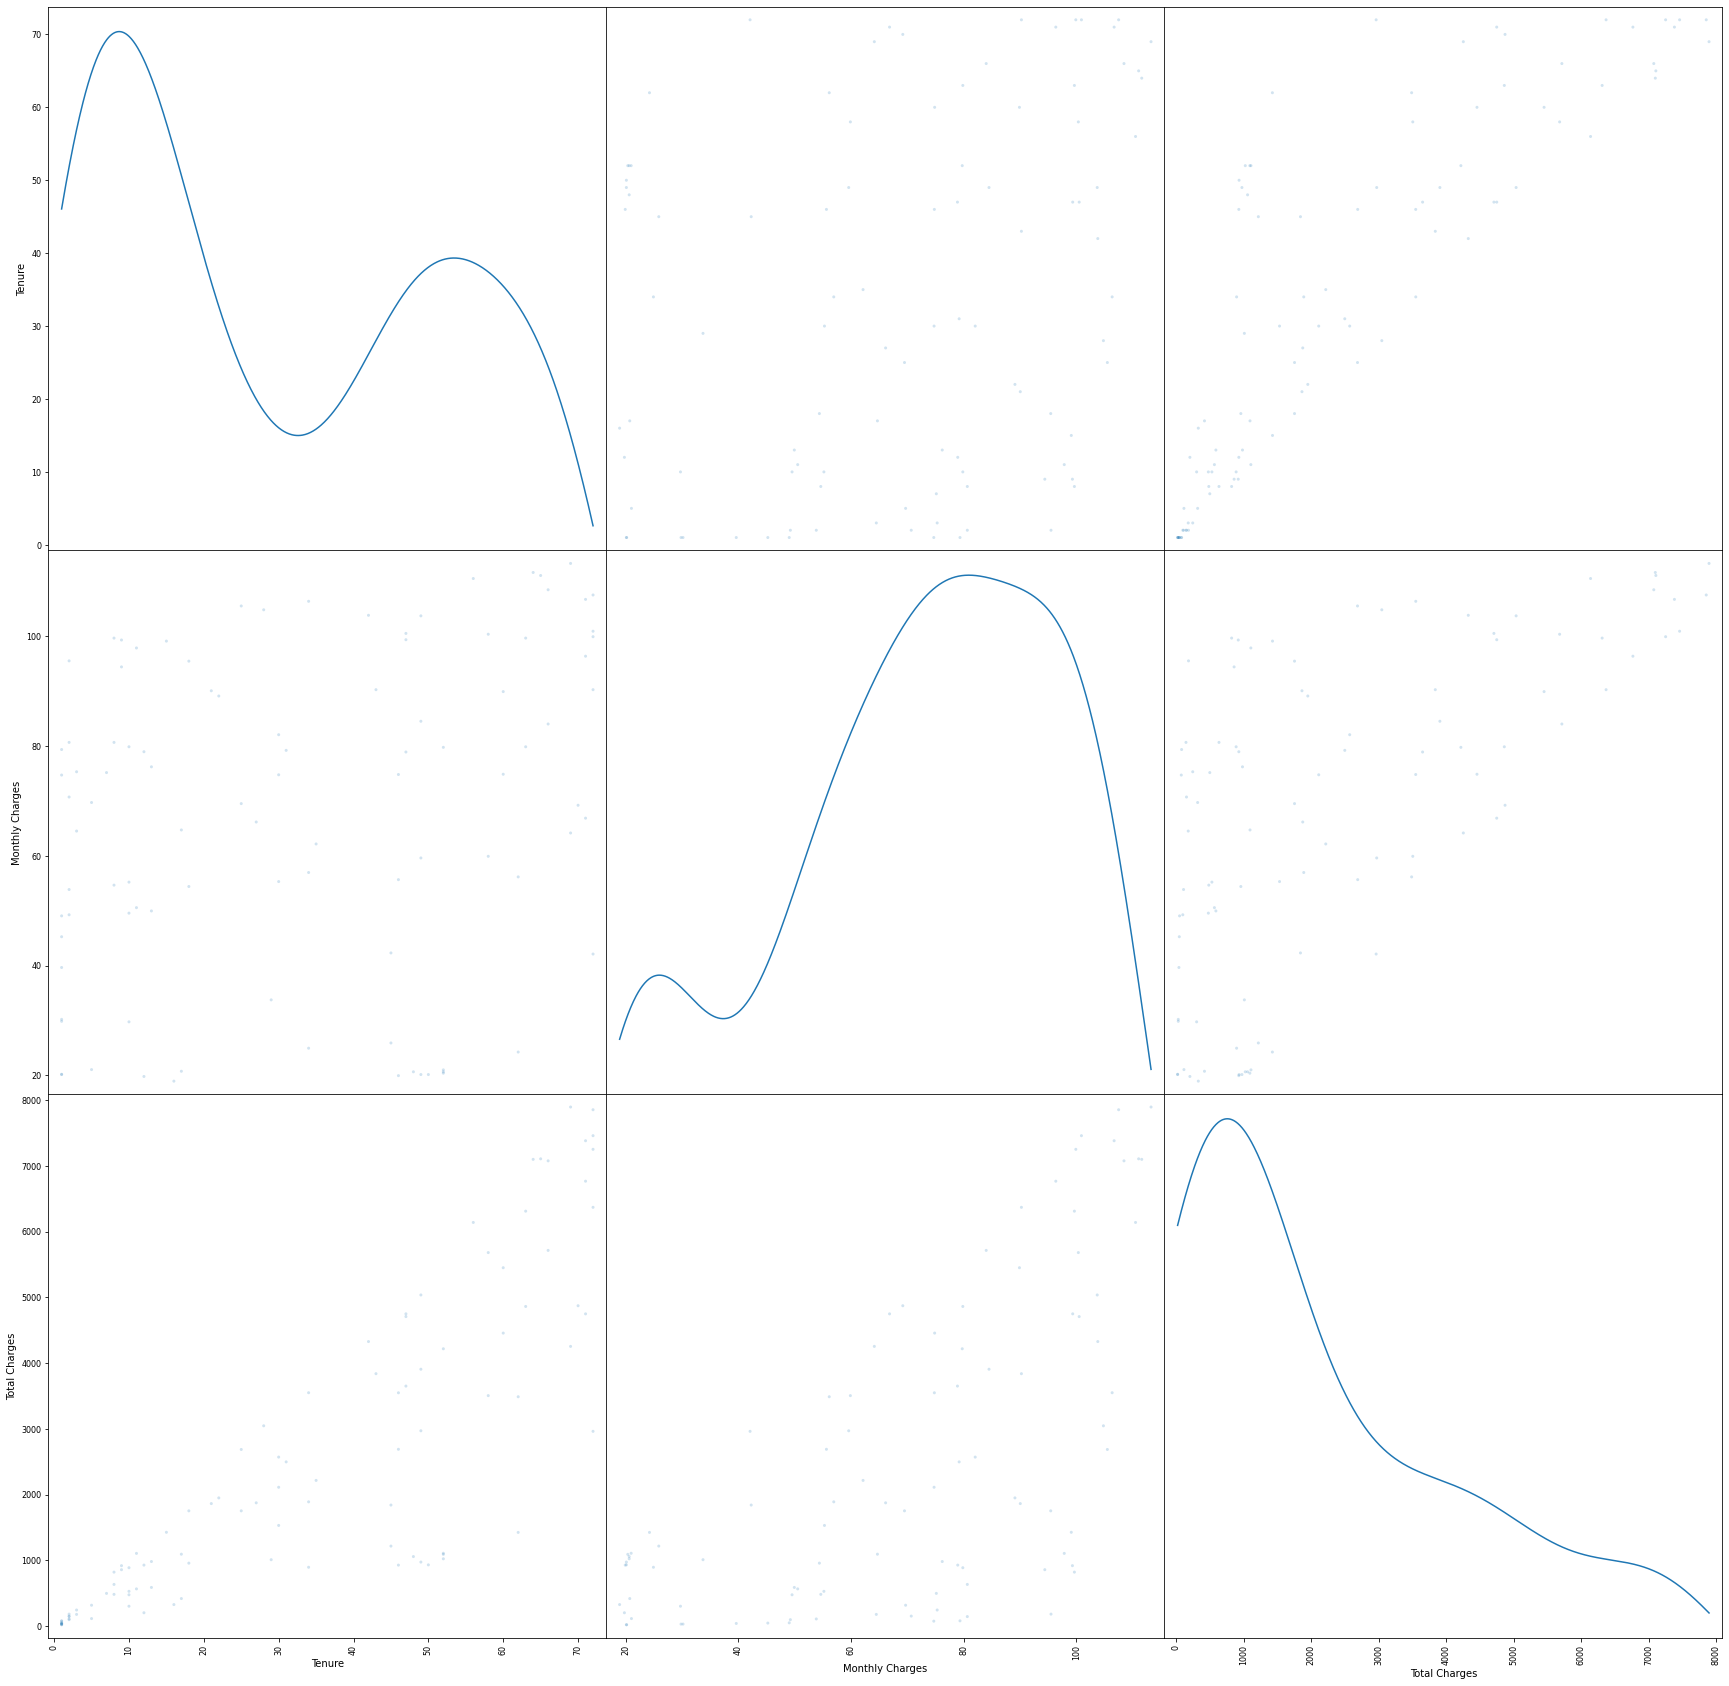

In [14]:
scatter_matrix(labeledData.select("Tenure", "Monthly Charges", "Total Charges").toPandas(), alpha=0.2, figsize=(30, 30), diagonal='kde')
#save_fig("scatter_matrix")
plt.show()

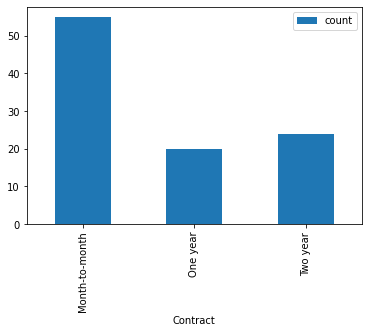

In [16]:
df_plans = df.groupBy("Internet Service").count()
#df_plans.show()
#df_plans.toPandas().plot.bar(x="Internet_Sevice")
df_contracts = df.groupBy("Contract").count()
#df_contracts.show()
df_contracts.toPandas().plot.bar(x="Contract")
pd_contracts = df_contracts.toPandas()
#labeledData.toPandas().plot.bar(x="Contract", y="Total_Charges_Int")
#matplotlib inline

order = labeledData.sort("Tenure")
pd_order = order.toPandas()
#HTML(pd_order.to_html())



### Visualize the data

In [ ]:
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
@interact 
def hallowelt_1(axis_types = ["Different Axes", "Same Axes"], column1 = df_pandas.columns, column2 = df_pandas.columns): 
    fig, ax1 = plt.subplots(figsize=(20,10))
    df_pandas.plot(x="CustomerID_Int", y= column1, ax = ax1)
    if axis_types == "Same Axes":
        df_pandas.plot(x=1, y=column2, ax = ax1, color = "orange")
    else:
        ax1.legend(loc = "upper left")
        ax2 = ax1.twinx()
        df_pandas.plot(x=1, y=column2, ax = ax2, color = "orange")
        ax2.legend(loc = "upper right")

In [ ]:
featureCols = df.columns.copy()
featureCols.remove("LEAVE")
featureCols.remove("COLLEGE")
featureCols.remove("REPORTED_SATISFACTION")
featureCols.remove("REPORTED_USAGE_LEVEL")
featureCols.remove("CONSIDERING_CHANGE_OF_PLAN")
featureCols = featureCols +["COLLEGE_NUM", "rep_sat_label", "rep_usage_label", "cons_label" ]
print(featureCols)
# TODO add additinal columns to feature vector

### Build the feature Vector Assembler

In [ ]:
assembler =  VectorAssembler(outputCol="features", inputCols=list(featureCols))

### Convert indexed labels back to original labels

In [ ]:
predConverter = IndexToString(inputCol="prediction",outputCol="predictedLabel",labels=labelIndexer.labels)

## Do the Data Preparation

In [ ]:
labeledData = labelIndexer.transform(df)
labeledData = collegeIndexer.transform(labeledData)
labeledData = rep_satIndexer.transform(labeledData)
labeledData = rep_usageIndexer.transform(labeledData)
indexedLabeledData = consIndexer.transform(labeledData)
# TODO add the other additional indexer
labeledPointData = assembler.transform(indexedLabeledData)


### Spliting the dataset into train and test set

In [ ]:
splits = labeledPointData.randomSplit([0.6, 0.4 ], 1234)
train = splits[0]
test = splits[1]

## Build the decision tree model

In [ ]:
# TODO Optimize the properties 
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", impurity="entropy")
dtModel = dt.fit(train)
print(dtModel)


## Build an evaluator

In [ ]:
evaluator =  BinaryClassificationEvaluator(labelCol="label",rawPredictionCol="prediction", metricName="areaUnderROC")

## Do the prediction 

In [ ]:
predictions = dtModel.transform(test)
predictionsConverted = predConverter.transform(predictions)

## Evaluate / Test the Model 

In [ ]:
predictionsConverted.select("prediction", "label", "predictedLabel", "LEAVE", "features").show()
# Select (prediction, true label) and compute test error.
   
accuracy = evaluator.evaluate(predictions)
print("Test Error = " ,(1.0 - accuracy))

In [ ]:
spark.stop()